### Import necessary libraries

In [24]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import dabest
from scipy import stats
import itertools

### csv infomation
0: metastatic volume? \
1: distance from Ki67? \
2: distance from VEGFR3? \
3: distance from Iba1? \

In [2]:
def read_data_1xseries(file: str, file_number: int) -> pd.DataFrame:
    """Read experiment csv dataset.

    Parameters
    ----------
    file : str
        filename
    file_number : int
        file number in order.

    Returns
    -------
    pd.DataFrame
        Dataframe column info:
        "volume": Metastatic tumor volume of A549 (10^5 um^3)
        "d_Ki67": Distance from Ki67 (10^2 um)
        "d_VEGFR3": Distance from VEGFR3 (10^2 um)
        "d_Iba1": Distance from Iba1 (10^2 um)
    """
    df = pd.read_csv(file)
    df.columns = ["file", "volume", "d_Ki67", "d_VEGFR3", "d_Iba1"]
    df["file"] = file_number
    return df

files = [
    '190628_A549-mCh_BSA_Ki-F_VR3-549_Iba1-635_01_590CG_dp50-p10.csv',
    '190628_A549-mCh_BSA_Ki-F_VR3-549_Iba1-635_03_590CG_dp50-p10.csv',
    '190628_A549-mCh_BSA_Ki-F_VR3-549_Iba1-635_04_590CG_dp50-p10.csv',
    '190628_A549-mCh_BSA_Ki-F_VR3-549_Iba1-635_05_590CG_dp50-p10.csv',
    '190628_A549-mCh_Tb_Ki-F_VR3-549_Iba1-635_09_590CG_dp50-p10.csv',
    '190628_A549-mCh_Tb_Ki-F_VR3-549_Iba1-635_10_590CG_dp50-p10.csv',
    '190628_A549-mCh_Tb_Ki-F_VR3-549_Iba1-635_12_590CG_dp50-p10.csv',
    '190628_A549-mCh_Tb_Ki-F_VR3-549_Iba1-635_13_590CG_dp50-p10.csv',
]
df_list_1x = [read_data_1xseries(file, i + 11) for i, file in enumerate(files)]

df_sum11 = pd.concat(df_list_1x, axis=0)
df_sum12 = pd.concat(df_list_1x[0:4], axis=0, ignore_index=True)
df_sum13 = pd.concat(df_list_1x[4:8], axis=0, ignore_index=True)
df_sum14 = pd.concat(df_list_1x, axis=1)
df_sum15 = pd.concat([df_sum12, df_sum13], axis=1)

### csv infomation
0: metastatic volume? \
1: distance from Ki67? \
2: distance from VEGFR3? \
3: distance from A549?

In [3]:
def read_data_2xseries(file: str, file_number: int) -> pd.DataFrame:
    """Read experiment csv dataset.

    Parameters
    ----------
    file : str
        filename
    file_number : int
        file number in order.

    Returns
    -------
    pd.DataFrame
        Dataframe column info:
        "volume": Metastatic tumor volume of A549 (10^5 um^3)
        "d_Ki67": Distance from Ki67 (10^2 um)
        "d_VEGFR3": Distance from VEGFR3 (10^2 um)
        "d_A549": Distance from A549 (10^2 um)
    """
    df = pd.read_csv(file)
    df.columns = ["file", "volume", "d_Ki67", "d_VEGFR3", "d_A549"]
    df["file"] = file_number
    return df

files = [
    '190628_A549-mCh_BSA_Ki-F_VR3-549_Iba1-635_01_639CG_p10dp115.csv',
    '190628_A549-mCh_BSA_Ki-F_VR3-549_Iba1-635_03_639CG_p10dp115.csv',
    '190628_A549-mCh_BSA_Ki-F_VR3-549_Iba1-635_04_639CG_p10dp115.csv',
    '190628_A549-mCh_BSA_Ki-F_VR3-549_Iba1-635_05_639CG_p10dp115.csv',
    '190628_A549-mCh_Tb_Ki-F_VR3-549_Iba1-635_09_639CG_p10dp115.csv',
    '190628_A549-mCh_Tb_Ki-F_VR3-549_Iba1-635_10_639CG_p10dp115.csv',
    '190628_A549-mCh_Tb_Ki-F_VR3-549_Iba1-635_12_639CG_p10dp115.csv',
    '190628_A549-mCh_Tb_Ki-F_VR3-549_Iba1-635_13_639CG_p10dp115.csv',
]
df_list_2x = [read_data_2xseries(file, i + 21) for i, file in enumerate(files)]

df_sum21 = pd.concat(df_list_2x, axis=0)
df_sum22 = pd.concat(df_list_2x[0:4], axis=0, ignore_index=True)
df_sum23 = pd.concat(df_list_2x[4:8], axis=0, ignore_index=True)
df_sum24 = pd.concat(df_list_2x, axis=1)
df_sum25 = pd.concat([df_sum22, df_sum23], axis=1)

# 200421_Histgram

In [4]:
# plot configs
plt.style.use('ggplot') 

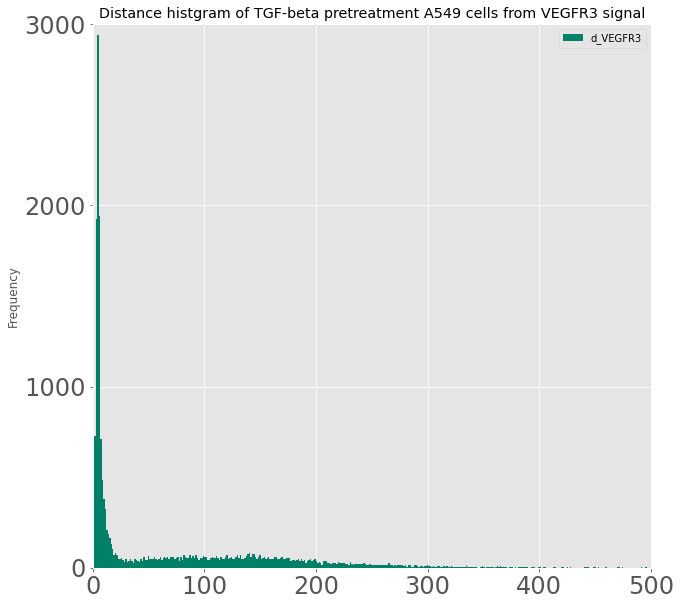

In [5]:
# Distance histgram of TGF-beta pretreatment A549 cells from VEGFR3 signal
dfg = df_sum15.iloc[:,[3]]
dfg.plot(kind='hist',stacked=True, density=False, bins=2000, alpha=1, figsize=(10,10), 
         title='Distance histgram of TGF-beta pretreatment A549 cells from VEGFR3 signal',
         grid=True, 
         xticks=[0, 100, 200, 300, 400, 500], xlim=[0,500],
         yticks=[0, 1000, 2000, 3000], ylim=[0,3000],
         fontsize=24, colormap='summer')
plt.savefig('200421_A549_Iba1_Ki67_Iba1_BSA_f590_tVR3_hist01.png')
plt.savefig('200421_A549_Iba1_Ki67_Iba1_BSA_f590_tVR3_hist01.pdf')

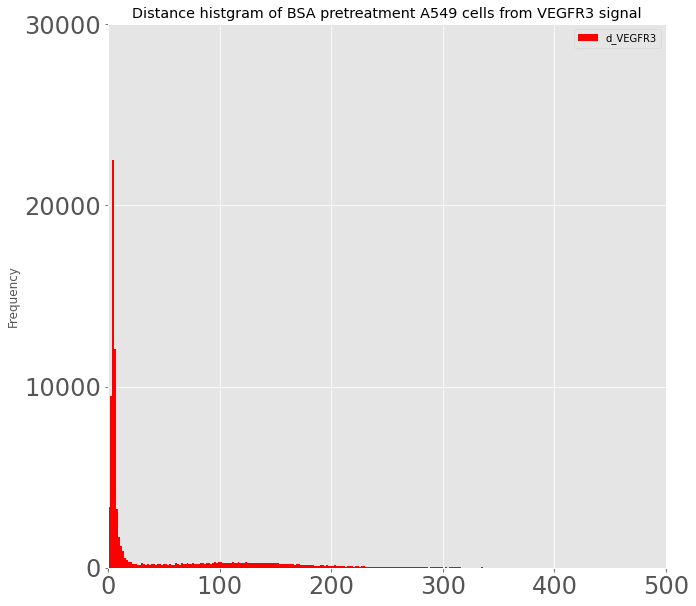

In [6]:
# Distance histgram of BSA pretreatment A549 cells from VEGFR3 signal
dfg = df_sum15.iloc[:,[8]]
dfg.plot(kind='hist',stacked=True, density=False, bins=2000, alpha=1, figsize=(10,10), 
         title='Distance histgram of BSA pretreatment A549 cells from VEGFR3 signal',
         grid=True, 
         xticks=[0, 100, 200, 300, 400, 500], xlim=[0,500],
         yticks=[0, 10000, 20000, 30000], ylim=[0,30000],
         fontsize=24, colormap='autumn')
plt.savefig('200421_A549_Iba1_Ki67_Iba1_Tb_f590_tVR3_hist02.png')
plt.savefig('200421_A549_Iba1_Ki67_Iba1_Tb_f590_tVR3_hist02.pdf')

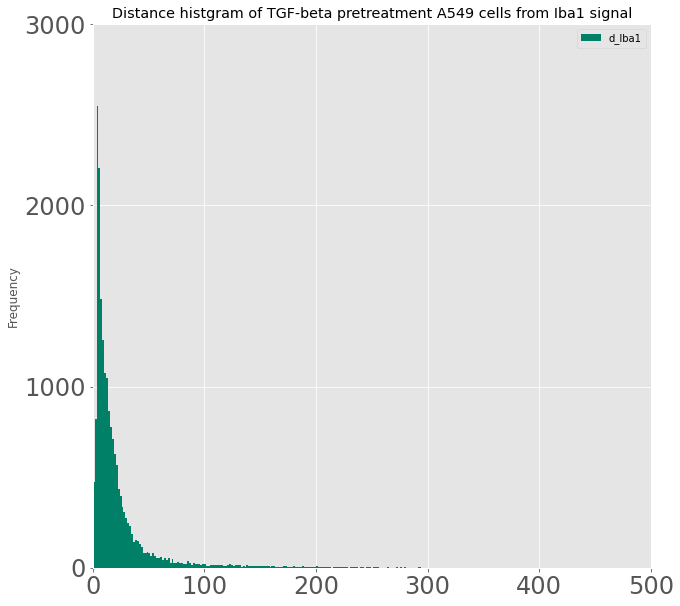

In [7]:
# Distance histgram of TGF-beta pretreatment A549 cells from Iba1 signal
dfg = df_sum15.iloc[:,[4]]
dfg.plot(kind='hist',stacked=True, density=False, bins=2000, alpha=1, figsize=(10,10), 
         title='Distance histgram of TGF-beta pretreatment A549 cells from Iba1 signal',
         grid=True, 
         xticks=[0, 100, 200, 300, 400, 500], xlim=[0,500],
         yticks=[0, 1000, 2000, 3000], ylim=[0,3000],
         fontsize=24, colormap='summer')
plt.savefig('200421_A549_Iba1_Ki67_Iba1_BSA_f590_tIba1_hist03.png')
plt.savefig('200421_A549_Iba1_Ki67_Iba1_BSA_f590_tIba1_hist03.pdf')

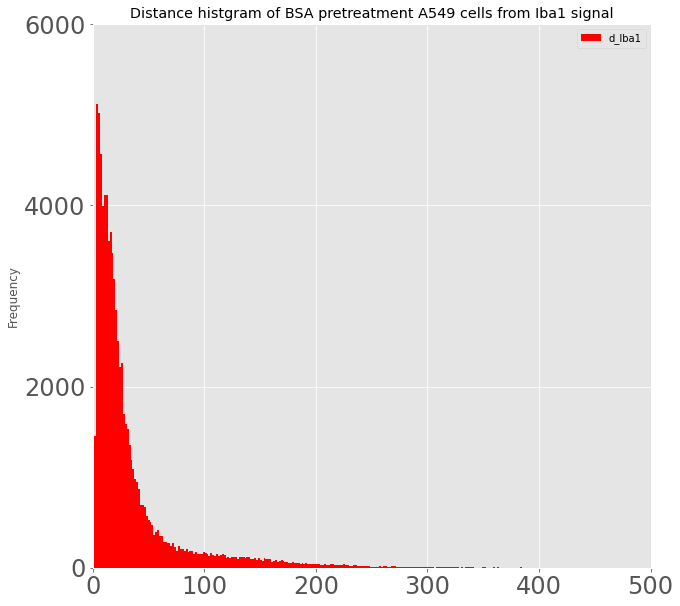

In [8]:
# Distance histgram of BSA pretreatment A549 cells from Iba1 signal
dfg = df_sum15.iloc[:,[9]]
dfg.plot(kind='hist',stacked=True, density=False, bins=2000, alpha=1, figsize=(10,10), 
         title='Distance histgram of BSA pretreatment A549 cells from Iba1 signal',
         grid=True, 
         xticks=[0, 100, 200, 300, 400, 500], xlim=[0,500],
         yticks=[0, 2000, 4000, 6000], ylim=[0,6000],
         fontsize=24, colormap='autumn')
plt.savefig('200421_A549_Iba1_Ki67_Iba1_Tb_f590_tIba1_hist04.png')
plt.savefig('200421_A549_Iba1_Ki67_Iba1_Tb_f590_tIba1_hist04.pdf')

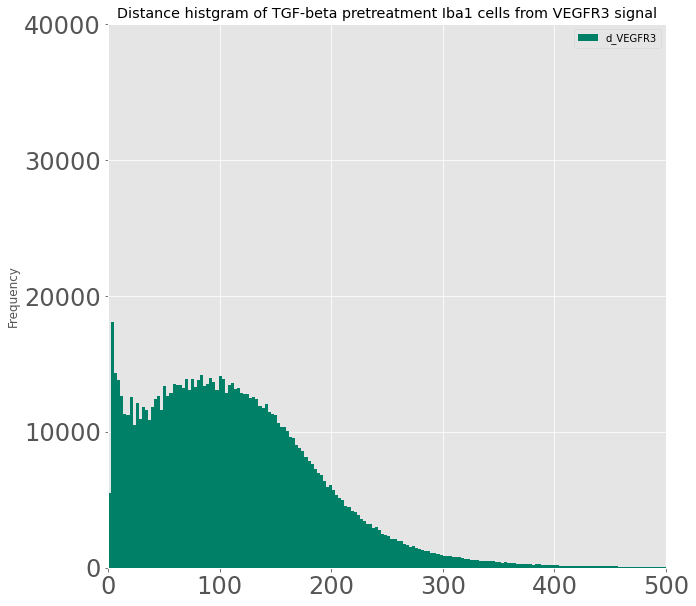

In [9]:
# Distance histgram of TGF-beta pretreatment Iba1 cells from VEGFR3 signal
dfg = df_sum25.iloc[:,[3]]
dfg.plot(kind='hist',stacked=True, density=False, bins=2000, alpha=1, figsize=(10,10), 
         title='Distance histgram of TGF-beta pretreatment Iba1 cells from VEGFR3 signal',
         grid=True, 
         xticks=[0, 100, 200, 300, 400, 500], xlim=[0,500],
         yticks=[0, 10000, 20000, 30000, 40000], ylim=[0,40000],
         fontsize=24, colormap='summer')
plt.savefig('200421_A549_Iba1_Ki67_Iba1_BSA_fIba1_tVR3_hist05.png')
plt.savefig('200421_A549_Iba1_Ki67_Iba1_BSA_fIba1_tVR3_hist05.pdf')

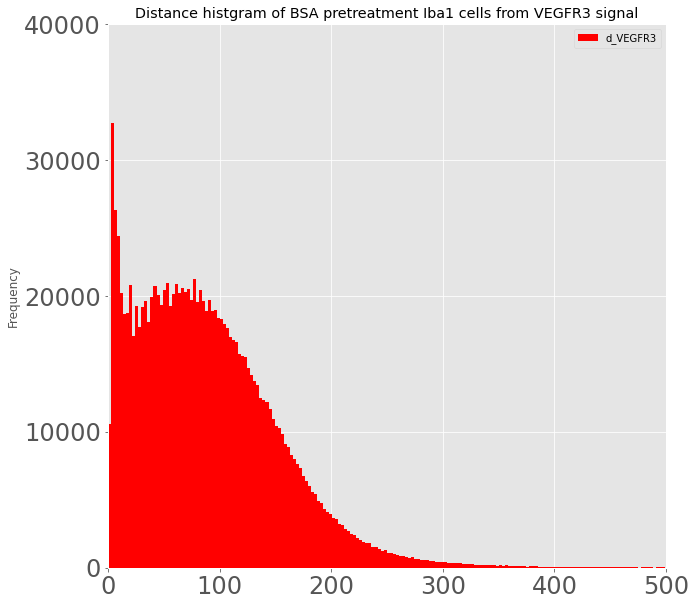

In [10]:
# Distance histgram of BSA pretreatment Iba1 cells from VEGFR3 signal
dfg = df_sum25.iloc[:,[8]]
dfg.plot(kind='hist',stacked=True, density=False, bins=2000, alpha=1, figsize=(10,10), 
         title='Distance histgram of BSA pretreatment Iba1 cells from VEGFR3 signal',
         grid=True, 
         xticks=[0, 100, 200, 300, 400, 500], xlim=[0,500],
         yticks=[0, 10000, 20000, 30000, 40000], ylim=[0,40000],
         fontsize=24, colormap='autumn')
plt.savefig('200421_A549_Iba1_Ki67_Iba1_Tb_fIba1_tVR3_hist06.png')
plt.savefig('200421_A549_Iba1_Ki67_Iba1_Tb_fIba1_tVR3_hist06.pdf')

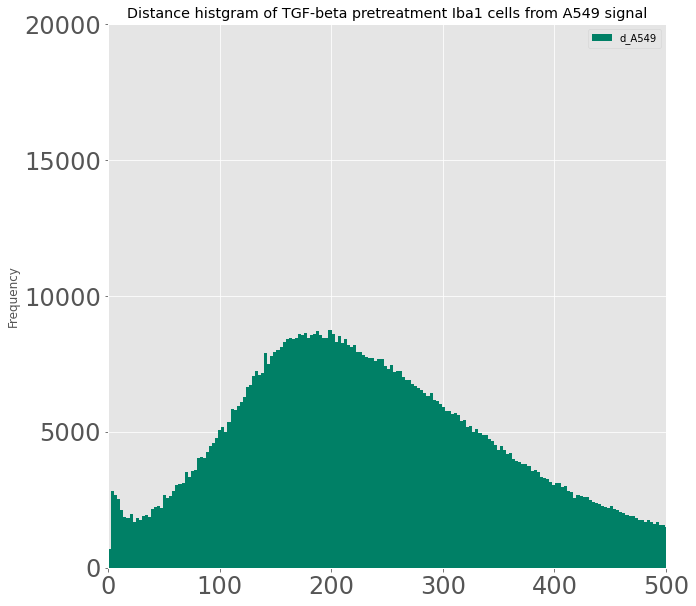

In [11]:
# Distance histgram of TGF-beta pretreatment Iba1 cells from A549 signal
dfg = df_sum25.iloc[:,[4]]
dfg.plot(kind='hist',stacked=True, density=False, bins=2000, alpha=1, figsize=(10,10), 
         title='Distance histgram of TGF-beta pretreatment Iba1 cells from A549 signal',
         grid=True, 
         xticks=[0, 100, 200, 300, 400, 500], xlim=[0,500],
         yticks=[0, 5000, 10000, 15000, 20000], ylim=[0,20000],
         fontsize=24, colormap='summer')
plt.savefig('200421_A549_Iba1_Ki67_Iba1_BSA_fIba1_t590_hist07.png')
plt.savefig('200421_A549_Iba1_Ki67_Iba1_BSA_fIba1_t590_hist07.pdf')

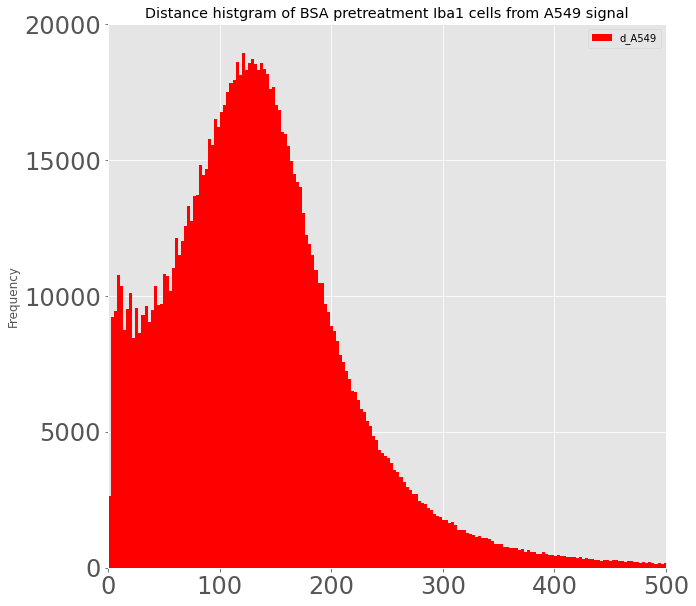

In [12]:
# Distance histgram of BSA pretreatment Iba1 cells from A549 signal
dfg = df_sum25.iloc[:,[9]]
dfg.plot(kind='hist',stacked=True, density=False, bins=2000, alpha=1, figsize=(10,10), 
         title='Distance histgram of BSA pretreatment Iba1 cells from A549 signal',
         grid=True, 
         xticks=[0, 100, 200, 300, 400, 500], xlim=[0,500],
         yticks=[0, 5000, 10000, 15000, 20000], ylim=[0,20000],
         fontsize=24, colormap='autumn')
plt.savefig('200421_A549_Iba1_Ki67_Iba1_Tb_fIba1_t590_hist08.png')
plt.savefig('200421_A549_Iba1_Ki67_Iba1_Tb_fIba1_t590_hist08.pdf')

### 200519

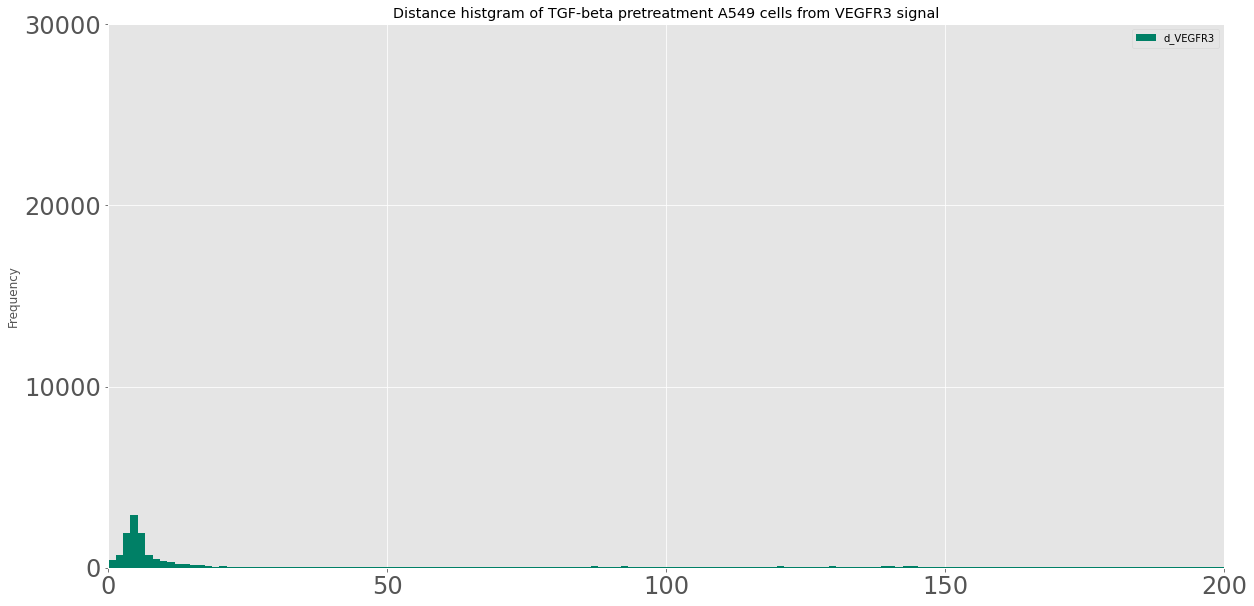

In [13]:
# Distance histgram of TGF-beta pretreatment A549 cells from VEGFR3 signal
dfg = df_sum15.iloc[:,[3]]
dfg.plot(kind='hist',stacked=True, density=False, bins=2000, alpha=1, figsize=(20,10), 
         title='Distance histgram of TGF-beta pretreatment A549 cells from VEGFR3 signal',
         grid=True, 
         xticks=[0, 50, 100, 150, 200], xlim=[0,200],
         yticks=[0, 10000, 20000, 30000], ylim=[0,30000],
         fontsize=24, colormap='summer')
plt.savefig('200519_A549_Iba1_Ki67_Iba1_BSA_f590_tVR3_hist01.png')
plt.savefig('200519_A549_Iba1_Ki67_Iba1_BSA_f590_tVR3_hist01.pdf')

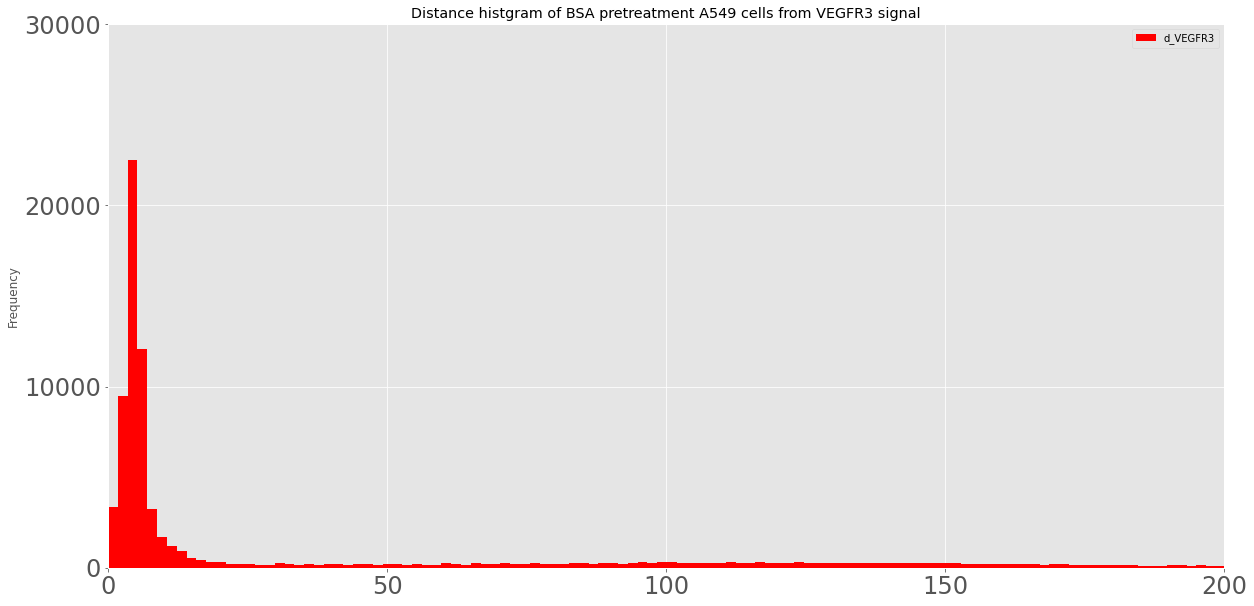

In [14]:
# Distance histgram of BSA pretreatment A549 cells from VEGFR3 signal
dfg = df_sum15.iloc[:,[8]]
dfg.plot(kind='hist',stacked=True, density=False, bins=2000, alpha=1, figsize=(20,10), 
         title='Distance histgram of BSA pretreatment A549 cells from VEGFR3 signal',
         grid=True, 
         xticks=[0, 50, 100, 150, 200], xlim=[0,200],
         yticks=[0, 10000, 20000, 30000], ylim=[0,30000],
         fontsize=24, colormap='autumn')
plt.savefig('200519_A549_Iba1_Ki67_Iba1_Tb_f590_tVR3_hist02.png')
plt.savefig('200519_A549_Iba1_Ki67_Iba1_Tb_f590_tVR3_hist02.pdf')

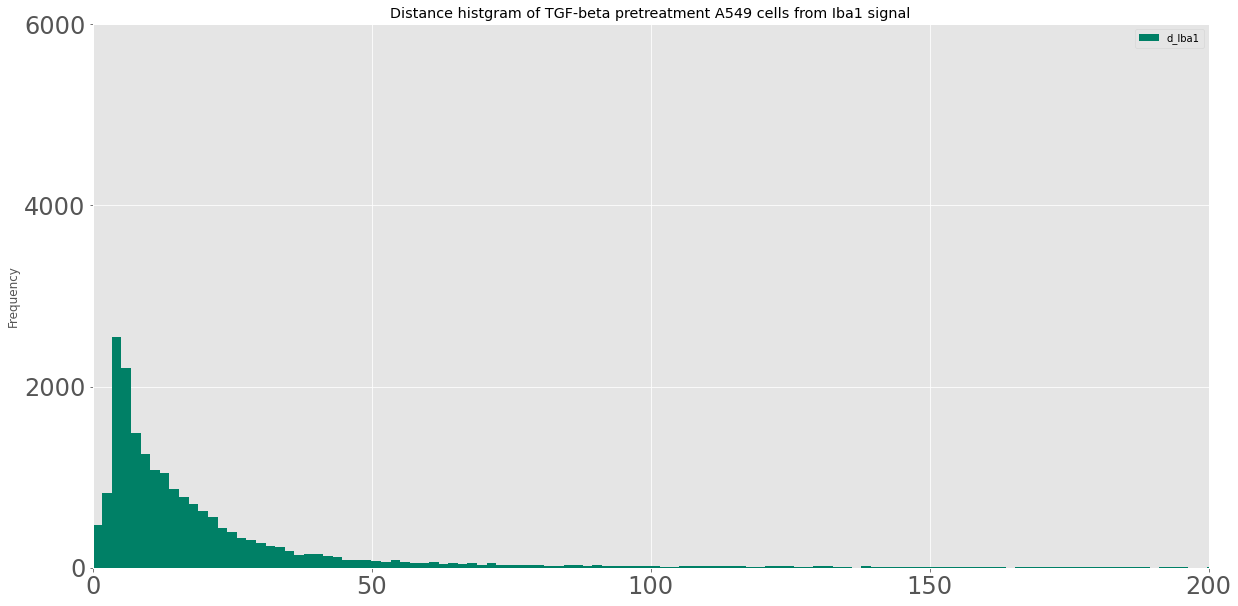

In [15]:
# Distance histgram of TGF-beta pretreatment A549 cells from Iba1 signal
dfg = df_sum15.iloc[:,[4]]
dfg.plot(kind='hist',stacked=True, density=False, bins=2000, alpha=1, figsize=(20,10), 
         title='Distance histgram of TGF-beta pretreatment A549 cells from Iba1 signal',
         grid=True, 
         xticks=[0, 50, 100, 150, 200], xlim=[0,200],
         yticks=[0, 2000, 4000, 6000], ylim=[0,6000],
         fontsize=24, colormap='summer')
plt.savefig('200519_A549_Iba1_Ki67_Iba1_BSA_f590_tIba1_hist03.png')
plt.savefig('200519_A549_Iba1_Ki67_Iba1_BSA_f590_tIba1_hist03.pdf')

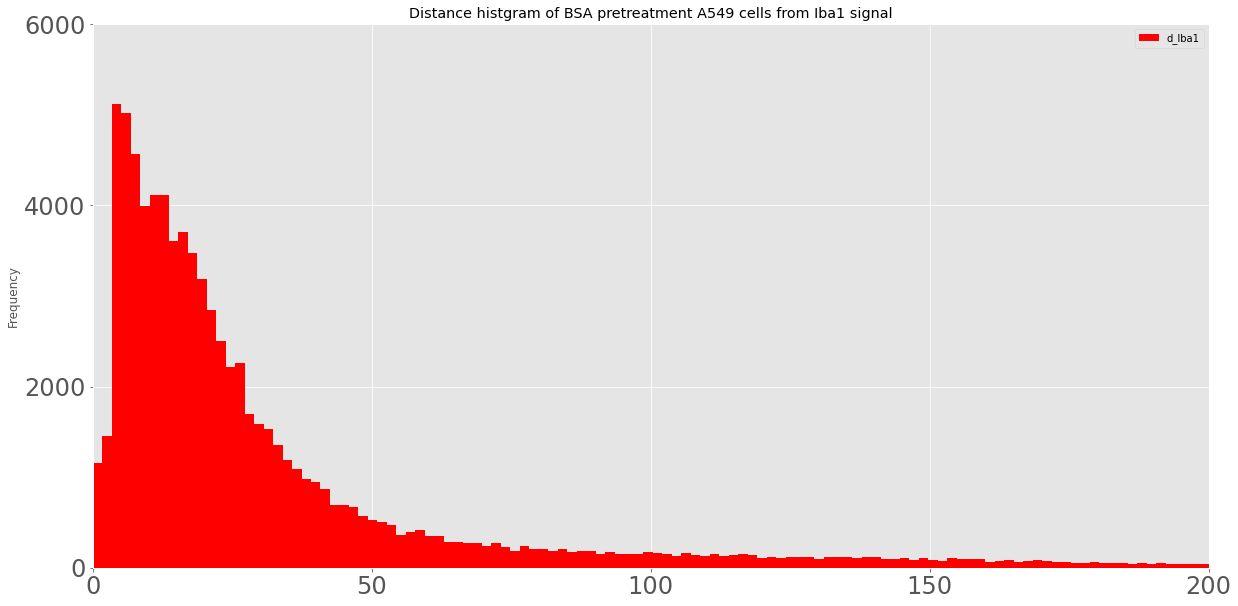

In [16]:
# Distance histgram of BSA pretreatment A549 cells from Iba1 signal
dfg = df_sum15.iloc[:,[9]]
dfg.plot(kind='hist',stacked=True, density=False, bins=2000, alpha=1, figsize=(20,10), 
         title='Distance histgram of BSA pretreatment A549 cells from Iba1 signal',
         grid=True, 
         xticks=[0, 50, 100, 150, 200], xlim=[0,200],
         yticks=[0, 2000, 4000, 6000], ylim=[0,6000],
         fontsize=24, colormap='autumn')
plt.savefig('200519_A549_Iba1_Ki67_Iba1_Tb_f590_tIba1_hist04.png')
plt.savefig('200519_A549_Iba1_Ki67_Iba1_Tb_f590_tIba1_hist04.pdf')

## Clodronate

In [28]:
# Load the csv dataset
A549 = pd.read_csv("181226_Clodronate.csv")

df_A549 = A549.iloc[:,[0, 1, 2, 3, 4, 5, 6, 7]]

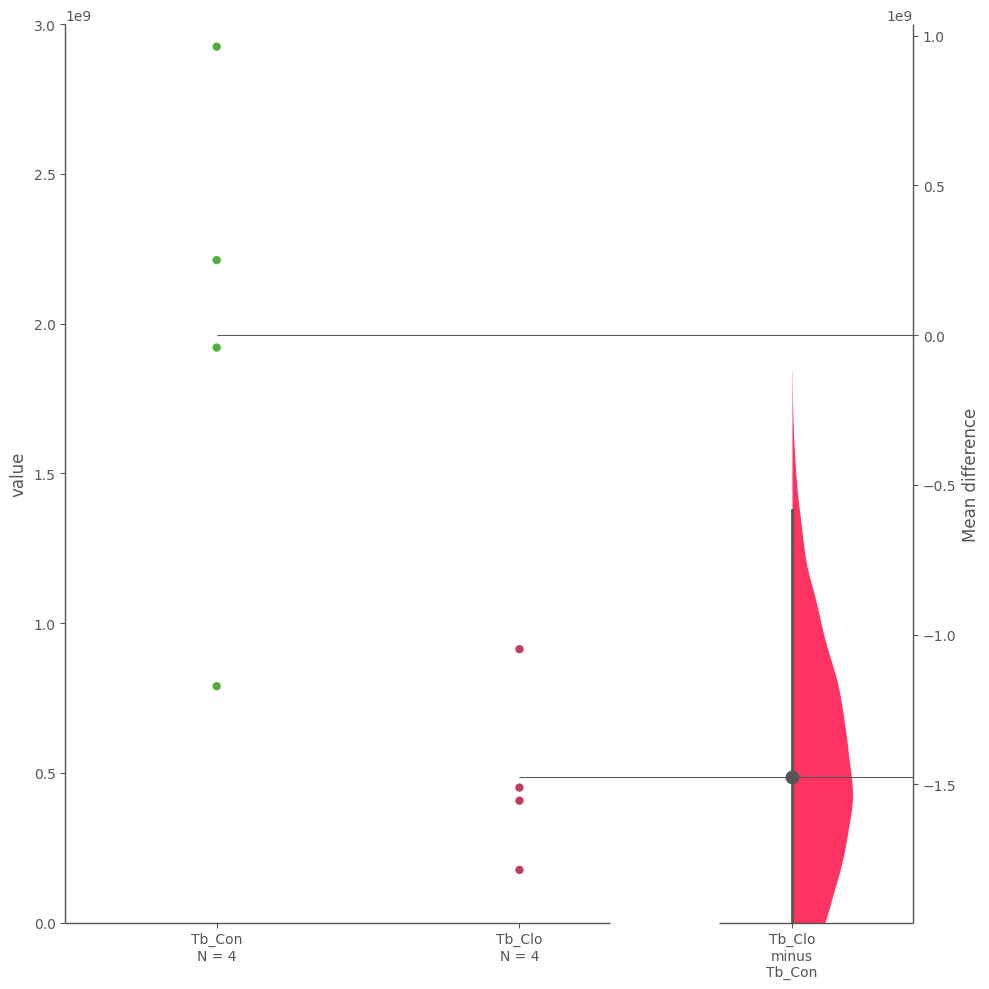

In [18]:
# Load the above data into 'dabest'
A549_dabest = dabest.load(df_A549, idx=("Tb_Con", "Tb_Clo"), ci=95)
A549_dabest.mean_diff.plot(fig_size=(10, 10), custom_palette="prism",
                           swarm_ylim=(0, 3000000000))

plt.savefig("190703_A549_Clodronate_TbVol_01_demo.png")
plt.savefig("190703_A549_Clodronate_TbVol_01_demo.pdf")

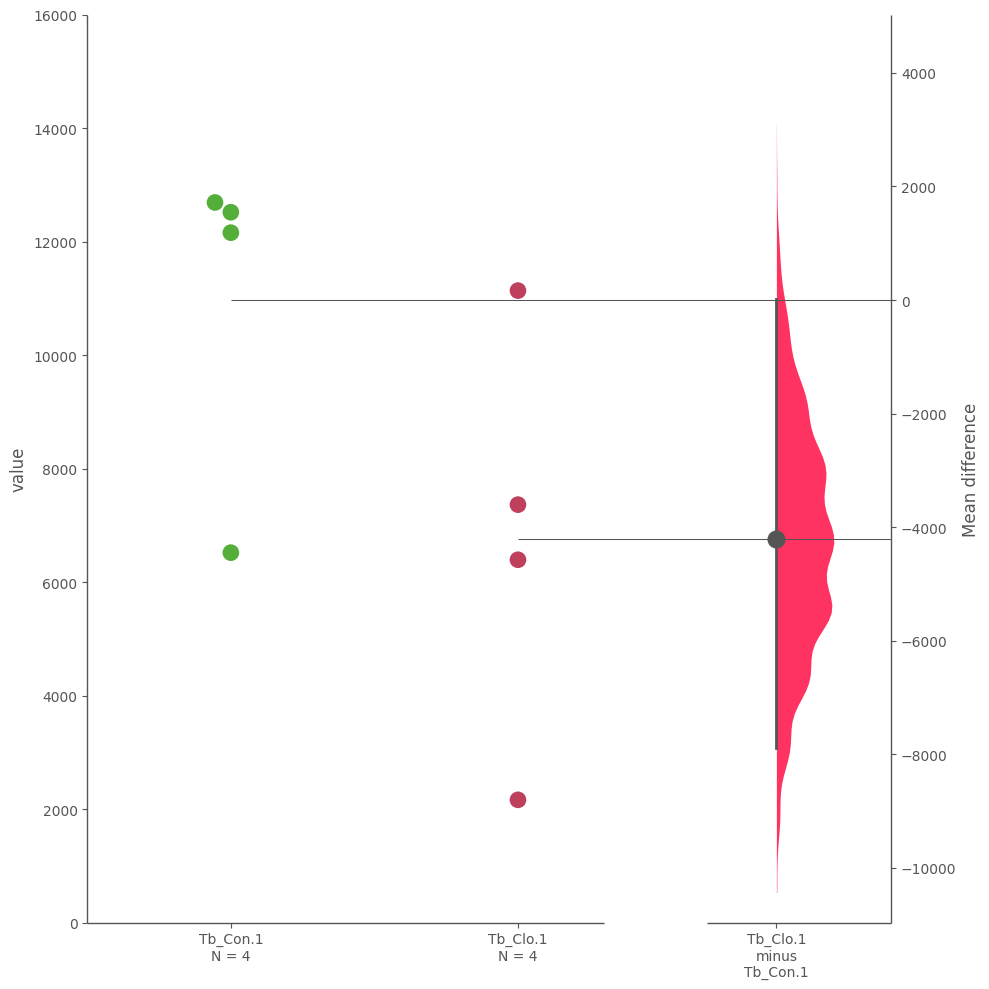

In [19]:
A549_dabest = dabest.load(df_A549, idx=("Tb_Con.1", "Tb_Clo.1"), ci=95)
A549_dabest.mean_diff.plot(fig_size=(10, 10), custom_palette="prism",
                           raw_marker_size=12, es_marker_size=12, swarm_ylim=(0, 16000))

plt.savefig("190703_A549_Clodronate_TbNum_02.png")
plt.savefig("190703_A549_Clodronate_TbNum_02.pdf")

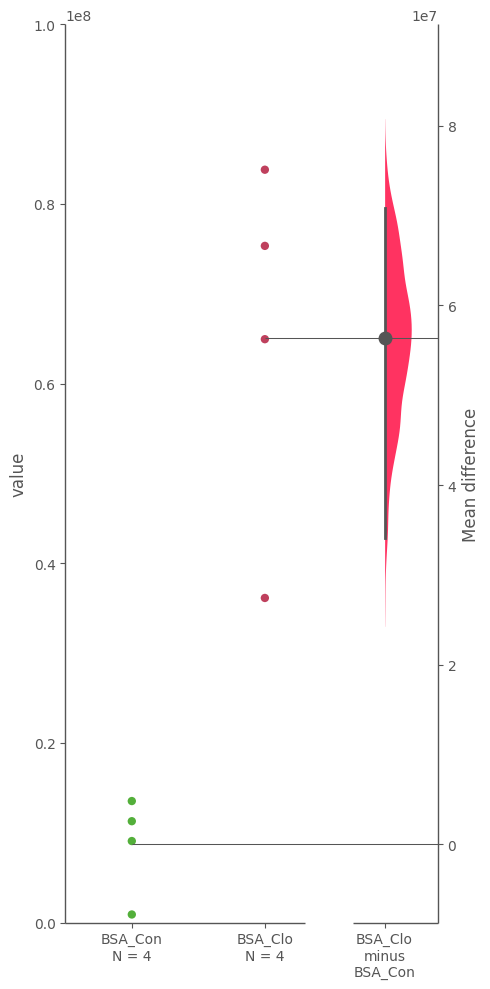

In [20]:
# Load the above data into 'dabest'
A549_dabest = dabest.load(df_A549, idx=("BSA_Con", "BSA_Clo"), ci=95)
A549_dabest.mean_diff.plot(fig_size=(5, 10), custom_palette="prism",
                           swarm_ylim=(0, 100000000))

plt.savefig("190703_A549_Clodronate_BSAVol_03.png")
plt.savefig("190703_A549_Clodronate_BSAVol_03.pdf")

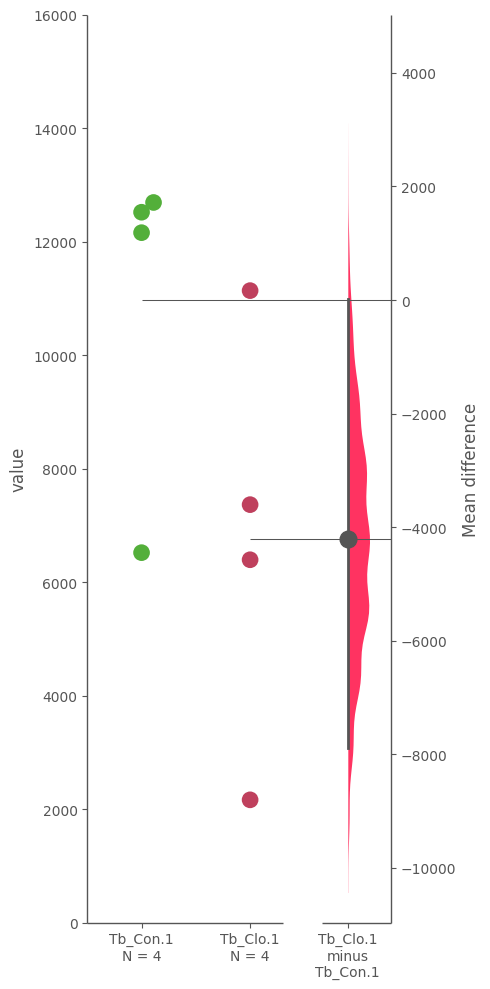

In [21]:
# Load the above data into 'dabest'
A549_dabest = dabest.load(df_A549, idx=("Tb_Con.1", "Tb_Clo.1"), ci=95)
A549_dabest.mean_diff.plot(fig_size=(5, 10), raw_marker_size=12, es_marker_size=12,
                           custom_palette="prism",swarm_ylim=(0, 16000))

plt.savefig("190703_A549_Clodronate_BSANum_04.png")
plt.savefig("190703_A549_Clodronate_BSANum_04.pdf")

## Clodronate t-test

In [31]:
def colwise_ttest(data: pd.DataFrame) -> pd.DataFrame:
    """Execute pairwise t-test for given dataframe.

    Parameters
    ----------
    data : pd.DataFrame

    Returns
    -------
    pd.DataFrame
    """
    colpairs = itertools.combinations(data.columns, 2)
    # Keep same reporter columns only.
    colpairs = [pair for pair in colpairs if pair[0].split("_")[0] == pair[1].split("_")[0]]
    df = pd.DataFrame(colpairs, columns=["pair0", "pair1"])
    df["pvalue"] = [
        stats.ttest_ind(data[pair[0]], data[pair[1]], equal_var=False).pvalue for pair in colpairs
    ]
    return df

pair0    pair1    pvalue
0  BSA_Con  BSA_Clo  0.009632
1   Tb_Con   Tb_Clo  0.038686

In [33]:
colwise_ttest(df_A549.iloc[:,0:4])

pair0    pair1    pvalue
0  BSA_Con  BSA_Clo  0.009632
1   Tb_Con   Tb_Clo  0.038686

In [32]:
colwise_ttest(df_A549.iloc[:,4:8])

pair0      pair1    pvalue
0  BSA_Con.1  BSA_Clo.1  0.000639
1   Tb_Con.1   Tb_Clo.1  0.128374